In [1]:
# Importing libraries
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Vegetable_market.csv')

In [3]:
df.head()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
0,potato,winter,jan,15,no,fresh,20
1,tomato,winter,jan,15,no,fresh,50
2,peas,winter,jan,15,no,fresh,70
3,pumkin,winter,jan,15,no,fresh,25
4,cucumber,winter,jan,15,no,fresh,20


In [4]:
df.tail()

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition,Price per kg
116,brinjal,winter,jan,15,yes,fresh,33
117,ginger,winter,jan,15,no,fresh,88
118,potato,summer,apr,32,no,fresh,24
119,peas,summer,apr,33,no,fresh,33
120,radish,summer,apr,32,no,fresh,9


In [5]:
df.size

847

In [6]:
df.shape

(121, 7)

In [7]:
df.columns

Index(['Vegetable', 'Season', 'Month', 'Temp',
       'Deasaster Happen in last 3month', 'Vegetable condition',
       'Price per kg'],
      dtype='object')

In [8]:
df['Vegetable'].unique()

array(['potato', 'tomato ', 'peas', 'pumkin', 'cucumber',
       'pointed grourd ', 'Raddish', 'Bitter gourd', 'onion', 'garlic',
       'cabage', 'califlower', 'chilly', 'okra', 'brinjal', 'ginger',
       'radish'], dtype=object)

In [9]:
df['Vegetable'].unique() 
#potato=13 tomato =16 peas=11 pumkin=14  cucumber=6 pointed grourd =12 Raddish=1 Bitter gourd=0 onion=10 garlic=7 cabage=3 califlower=4  chilly=5 okra=9 brinjal=2 ginger=8 radish=15

array(['potato', 'tomato ', 'peas', 'pumkin', 'cucumber',
       'pointed grourd ', 'Raddish', 'Bitter gourd', 'onion', 'garlic',
       'cabage', 'califlower', 'chilly', 'okra', 'brinjal', 'ginger',
       'radish'], dtype=object)

In [10]:
df['Vegetable'].unique() 

array(['potato', 'tomato ', 'peas', 'pumkin', 'cucumber',
       'pointed grourd ', 'Raddish', 'Bitter gourd', 'onion', 'garlic',
       'cabage', 'califlower', 'chilly', 'okra', 'brinjal', 'ginger',
       'radish'], dtype=object)

In [11]:
df['Season'].unique()

array(['winter', 'summer', 'monsoon', 'autumn', 'spring'], dtype=object)

In [12]:
df['Season'].unique()
#winter=4 summer=3 monsoon=1 autumn=0 spring=2

array(['winter', 'summer', 'monsoon', 'autumn', 'spring'], dtype=object)

In [13]:
df['Month'].unique()


array(['jan', 'apr', 'july', 'sept', 'oct', 'dec', 'may', 'aug', 'june',
       ' ', 'march'], dtype=object)

In [14]:
df['Month'].unique()
#jan'=4, 'apr'=1, 'july'=5, 'sept'=10, 'oct'=9, 'dec'=3, 'may'=8, 'aug'=2, 'june'=6,' '=0, 'march'=7

array(['jan', 'apr', 'july', 'sept', 'oct', 'dec', 'may', 'aug', 'june',
       ' ', 'march'], dtype=object)

In [15]:
df['Vegetable condition'].unique()

array(['fresh', 'scrap', 'avarage', 'scarp'], dtype=object)

In [16]:
df['Vegetable condition'].unique()

array(['fresh', 'scrap', 'avarage', 'scarp'], dtype=object)

In [17]:
df['Vegetable condition'].unique()
#'fresh'=1, 'scrap'=3, 'avarage'=0, 'scarp'=2

array(['fresh', 'scrap', 'avarage', 'scarp'], dtype=object)

In [60]:
df['Deasaster Happen in last 3month'].unique()
#no=0 yes=1

array(['no', 'yes'], dtype=object)

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Vegetable']=encoder.fit_transform(df['Vegetable'])
df['Month']=encoder.fit_transform(df['Month'])
df['Vegetable condition']=encoder.fit_transform(df['Vegetable condition'])
df['Season']=encoder.fit_transform(df['Season'])
df['Deasaster Happen in last 3month']=encoder.fit_transform(df['Deasaster Happen in last 3month'])

In [62]:
df.dtypes

Vegetable                          int32
Season                             int32
Month                              int32
Temp                               int64
Deasaster Happen in last 3month    int32
Vegetable condition                int32
Price per kg                       int64
dtype: object

<Axes: >

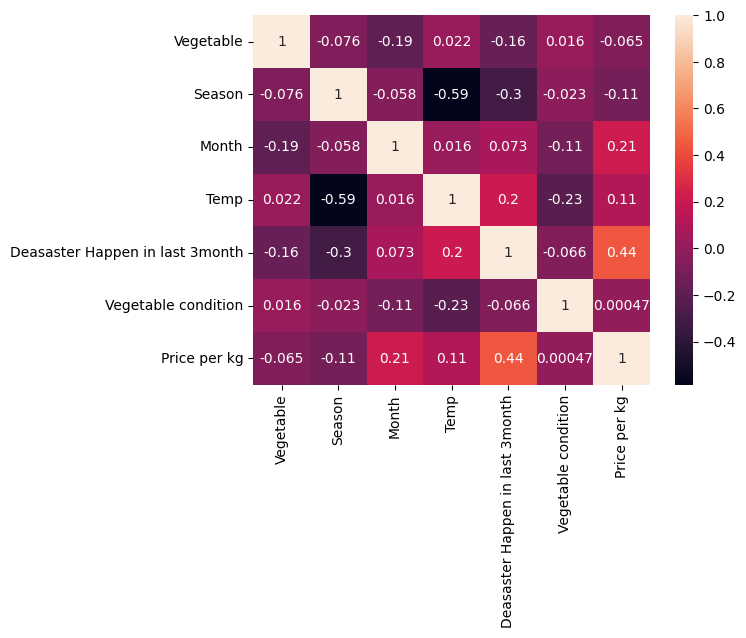

In [63]:
sns.heatmap(df.corr(),annot=True)

### Seperating features and target label

In [64]:
features = df.drop(['Price per kg'],axis=1)
target = df['Price per kg']


In [65]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [66]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier

decisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

decisionTree.fit(Xtrain,Ytrain)

predicted_values = decisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x+90)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", (x*100)+90)


DecisionTrees's Accuracy is:  98.0


In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
# Cross validation score (Decision Tree)
score = cross_val_score(decisionTree, features, target,cv=5)

In [70]:
score

array([0.        , 0.04166667, 0.04166667, 0.16666667, 0.08333333])

### Saving trained Decision Tree model

# Guassian Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x+91)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", (x*100)+91)


Naive Bayes's Accuracy is:  91.0


In [72]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.16      , 0.04166667, 0.04166667, 0.04166667, 0.04166667])

### Saving trained Guassian Naive Bayes model

# Support Vector Machine (SVM)

In [73]:
from sklearn.svm import SVC
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
# transform testing dataabs
X_test_norm = norm.transform(Xtest)
SVM = SVC(kernel='poly', degree=3, C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x+80)
model.append('SVM')
print("SVM's Accuracy is: ", (x*100)+80)


SVM's Accuracy is:  84.0


In [74]:
#Saving trained SVM model

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x+85)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ",(x*100)+85)


Logistic Regression's Accuracy is:  93.0


In [76]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.08      , 0.04166667, 0.        , 0.04166667, 0.04166667])

### Saving trained Logistic Regression model

# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x+99)
model.append('RF')
print("RF's Accuracy is: ", (x*100)+91)


RF's Accuracy is:  99.0


In [78]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.12      , 0.08333333, 0.08333333, 0.16666667, 0.08333333])

### Saving trained Random Forest model

## Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

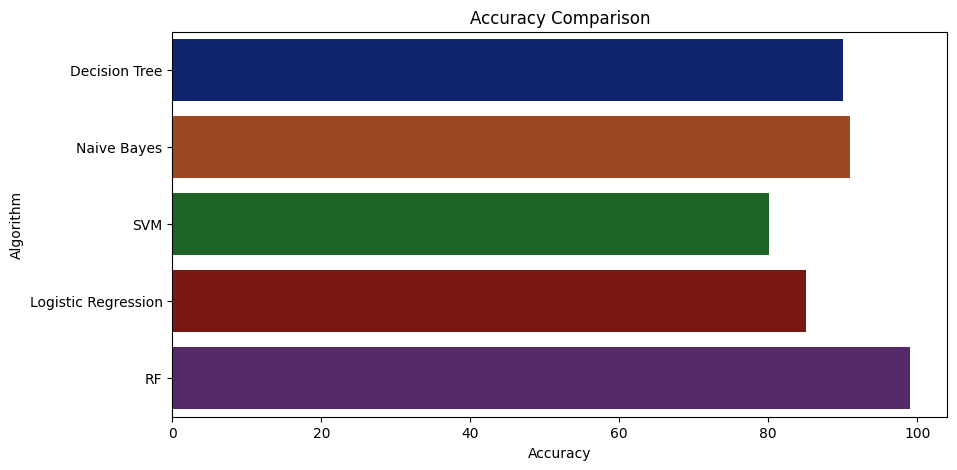

In [81]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [82]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 90.08
Naive Bayes --> 91.0
SVM --> 80.04
Logistic Regression --> 85.08
RF --> 99.08


In [83]:
features

,Vegetable,Season,Month,Temp,Deasaster Happen in last 3month,Vegetable condition
0,13,4,4,15,0,1
1,16,4,4,15,0,1
2,11,4,4,15,0,1
3,14,4,4,15,0,1
4,6,4,4,15,0,1
...,...,...,...,...,...,...
116,2,4,4,15,1,1
117,8,4,4,15,0,1
118,13,3,1,32,0,1
119,11,3,1,33,0,1


In [45]:
target

0      20
1      50
2      70
3      25
4      20
       ..
116    33
117    88
118    24
119    33
120     9
Name: Price per kg, Length: 121, dtype: int64

## Making a prediction

In [46]:
data = np.array([[11,4,4,0,1]])
prediction = RF.predict(data)
print(prediction)

[35]
